### Remarks:
###### Step 1: Select Target - bounding box 
###### Step 2: Select target to scale
###### Step 3: Select fixed target to remove camera shake

In [1]:
#Import Dependencies

import cv2
import cv2.legacy
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('bmh')

In [2]:
#Input demo video name.
video_fileName = 'demo.mp4'

### Initialize and select tracking algorithm

In [3]:
(major_ver, minor_ver, subminor_ver) = cv2.__version__.split('.')

#Define bounding box centroid
centroids_arr = []

#Choose tracker - depends on type of application and type of movement to track (high frequency, big amplitude, etc...)

tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']
tracker_type = tracker_types[4]

if tracker_type == 'BOOSTING':
    tracker = cv2.TrackerBoosting_create()
if tracker_type == 'MIL':
    tracker = cv2.TrackerMIL_create()
if tracker_type == 'KCF':
    tracker = cv2.TrackerKCF_create()
if tracker_type == 'TLD':
    tracker = cv2.TrackerTLD_create()
if tracker_type == 'MEDIANFLOW':
    tracker = cv2.legacy.TrackerMedianFlow_create()
if tracker_type == 'GOTURN':
    tracker = cv2.TrackerGOTURN_create()
if tracker_type == 'MOSSE':
    tracker = cv2.TrackerMOSSE_create()
if tracker_type == "CSRT":
    tracker = cv2.TrackerCSRT_create()

### Define Bounding Box Function

In [4]:
#DEFINE TRACKING BOX & CENTROID function 

def track_box(video_fileName):
    
    '''
    a function that returns list of object centroids across frames
    '''
    
   
    # Read video
    video = cv2.VideoCapture(video_fileName)

    # Exit if video not opened.
    if not video.isOpened():
        print ("Could not open video")
        sys.exit()
        
        
    # Read first frame.
    ok, frame = video.read()
    if not ok:
        print ('Cannot read video file')
        sys.exit()

#     # Define an initial bounding box X,Y,dX,dy
#     bbox = (287, 23, 86, 320)

    # OR user-defined bounding box
    bbox = cv2.selectROI(frame, False)

    # Initialize tracker with first frame and bounding box
    ok = tracker.init(frame, bbox)
    
    # Start clock cycles
    timer = cv2.getTickCount()

    while True:
        #Define centroid of bbox
        centroid = int(bbox[0]+bbox[2]/2), int(bbox[1] + bbox[3] /2)
        centroids_arr.append(centroid)

        # Read a new frame
        ok, frame = video.read()
        if not ok:
            break
            
        # Get frames per second
        fps = video.get(cv2.CAP_PROP_FPS)

        # Update tracker
        ok, bbox = tracker.update(frame)

        # Calculate Time
        Time = (cv2.getTickCount() - timer)/cv2.getTickFrequency();
        
        # Draw bounding box
        if ok:
            # Tracking success
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
        else :
            # Tracking failure
            cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

        # Display on frame
        cv2.putText(frame, tracker_type + " Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2);
        cv2.putText(frame, "Timer: " + str(int(Time)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);
        #cv2.putText(frame, "Frames/sec : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);
        
        # Display result
        cv2.imshow("Tracking", frame)

        # Exit if ESC pressed
        k = cv2.waitKey(1) & 0xff
        if k == 27 : break

    video.release()
    cv2.destroyAllWindows()
    
    return centroids_arr, fps

In [5]:
#Define centroid array based on track box definition
centroids_arr, fps = track_box(video_fileName)

In [6]:
#Extract x and y of track box centroid
x_1= np.array(centroids_arr)[:,0]
y_1= np.array(centroids_arr)[:,1] 

### Normalize axes

In [7]:
from __future__ import division

In [8]:
#Initialize video again to get dimensions from first frame    
    
    # Read video
video = cv2.VideoCapture(video_fileName)
    # Read first frame.
ok, frame = video.read()
    # Select normalizing bbox
bbox_norm = cv2.selectROI(frame, False)
video.release()
cv2.destroyAllWindows()

In [9]:
x_len = bbox_norm[2]
y_len = bbox_norm[3]
real_x = 5 #in --> Change this depending on selected target
#real_y= ...  #in --> only use if we're working with y axis scale, otherwise put sy=sx
sx=real_x/x_len
sy=sx

In [10]:
#Convert X axis into seconds
x_axis = np.arange(len(x_1))/fps

### Extract x and y arrays from centroids series

#### Plot movement on `x` axis 

Text(0, 0.5, 'Amplitude (Inches)')

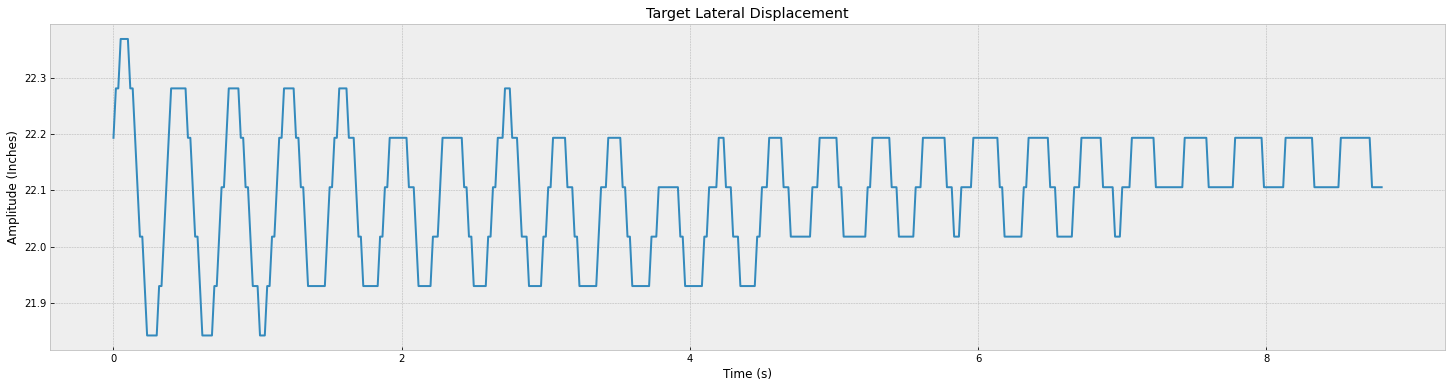

In [11]:
plt.figure(figsize=(25,6))
plt.plot(x_axis,x_1*sx)
plt.title('Target Lateral Displacement')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Inches)')

### Get Camera Shake - Fixed target

In [12]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('bmh')

In [13]:
video_fileName = 'demo.mp4'

In [14]:
'''
initilising and selecting tracking algorithm

'''
(major_ver, minor_ver, subminor_ver) = cv2.__version__.split('.')

centroids_arr= []

tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']
tracker_type = tracker_types[4]

# if int(minor_ver) < 3:
#     tracker = cv2.Tracker_create(tracker_type)
# else:
if tracker_type == 'BOOSTING':
    tracker = cv2.TrackerBoosting_create()
if tracker_type == 'MIL':
    tracker = cv2.TrackerMIL_create()
if tracker_type == 'KCF':
    tracker = cv2.TrackerKCF_create()
if tracker_type == 'TLD':
    tracker = cv2.TrackerTLD_create()
if tracker_type == 'MEDIANFLOW':
    tracker = cv2.legacy.TrackerMedianFlow_create()
if tracker_type == 'GOTURN':
    tracker = cv2.TrackerGOTURN_create()
if tracker_type == 'MOSSE':
    tracker = cv2.TrackerMOSSE_create()
if tracker_type == "CSRT":
    tracker = cv2.TrackerCSRT_create()

In [15]:
#DEFINE TRACKING BOX & CENTROID function for FIXED TARGET

def track_box(video_fileName):
    
    '''
    a function that returns list of object centroids across frames
    '''

    # Read video
    video = cv2.VideoCapture(video_fileName)

    # Exit if video not opened.
    if not video.isOpened():
        print ("Could not open video")
        sys.exit()

    # Read first frame.
    ok, frame = video.read()
    if not ok:
        print ('Cannot read video file')
        sys.exit()

    # OR user-defined bounding box
    bbox_fixed = cv2.selectROI(frame, False)

    # Initialize tracker with first frame and bounding box
    ok = tracker.init(frame, bbox_fixed)

    while True:
        #Define centroid of bbox
        centroid = int(bbox_fixed[0]+bbox_fixed[2]/2), int(bbox_fixed[1] + bbox_fixed[3] /2)
        centroids_arr.append(centroid)

        # Read a new frame
        ok, frame = video.read()
        if not ok:
            break

        # Update tracker
        ok, bbox_fixed = tracker.update(frame)

        # Draw bounding box
        if ok:
            # Tracking success
            p1 = (int(bbox_fixed[0]), int(bbox_fixed[1]))
            p2 = (int(bbox_fixed[0] + bbox_fixed[2]), int(bbox_fixed[1] + bbox_fixed[3]))
            cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
        else :
            # Tracking failure
            cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

        # Display tracker type on frame
        cv2.putText(frame, tracker_type + " Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2);

        # Display result
        cv2.imshow("Tracking", frame)

        # Exit if ESC pressed
        k = cv2.waitKey(1) & 0xff
        if k == 27 : break

    video.release()
    cv2.destroyAllWindows()
    
    return centroids_arr


In [16]:
#Define centroid array based on track box definition
centroids_arr = track_box(video_fileName)

In [17]:
#Extract x and y of track box centroid for fixed target
x_fixed= np.array(centroids_arr)[:,0]
y_fixed= np.array(centroids_arr)[:,1] 

Text(0, 0.5, 'Amplitude (in)')

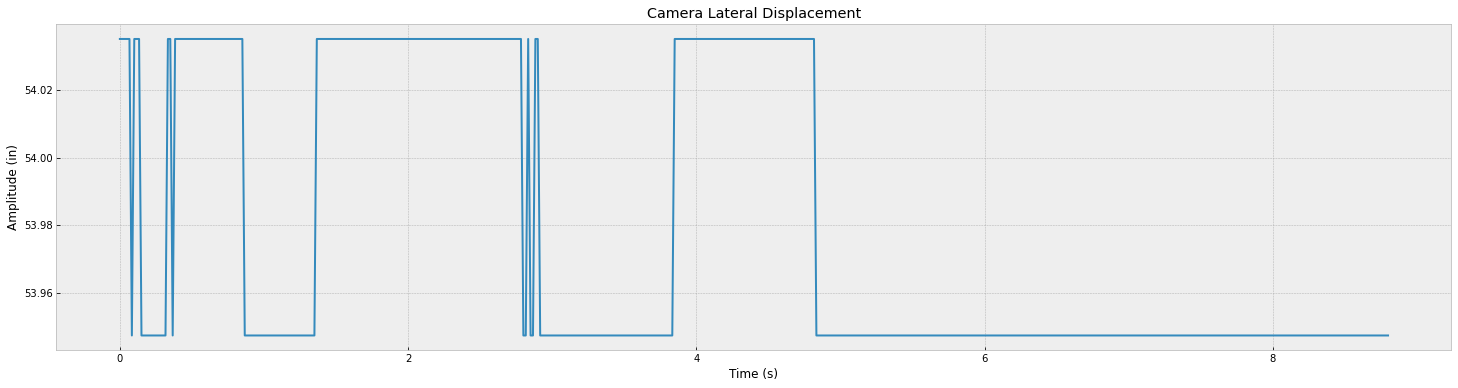

In [18]:
plt.figure(figsize=(25,6))
plt.plot(x_axis,x_fixed*sx)
plt.title('Camera Lateral Displacement')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (in)')

### Displacement with NO Camera Shake

In [19]:
# Get Displacement with no Camera shake = Coordinates wrt to new origin, fixed object. use absolute values
x1= np.abs(np.subtract(x_1,x_fixed))
y1= np.abs(np.subtract(y_1,y_fixed))

Text(0, 0.5, 'Amplitude (in)')

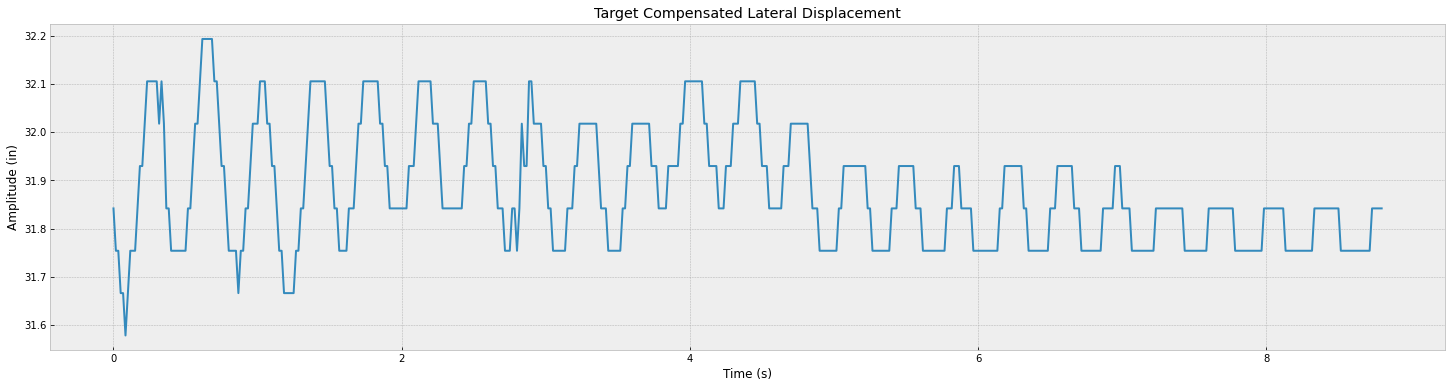

In [20]:
plt.figure(figsize=(25,6))
plt.plot(x_axis,(x1*sx))
plt.title('Target Compensated Lateral Displacement')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (in)')

# Post-Processing Signal -> Apply Low-Pass Filter to remove noise

### Set parameters

In [21]:
DURATION=len(x_axis)/fps   #Duration of signal (unit in seconds)
SAMPLE_RATE=fps            #Sample rate is frames per second of the video
N=DURATION*SAMPLE_RATE     #Number of samples (or total number of frames)

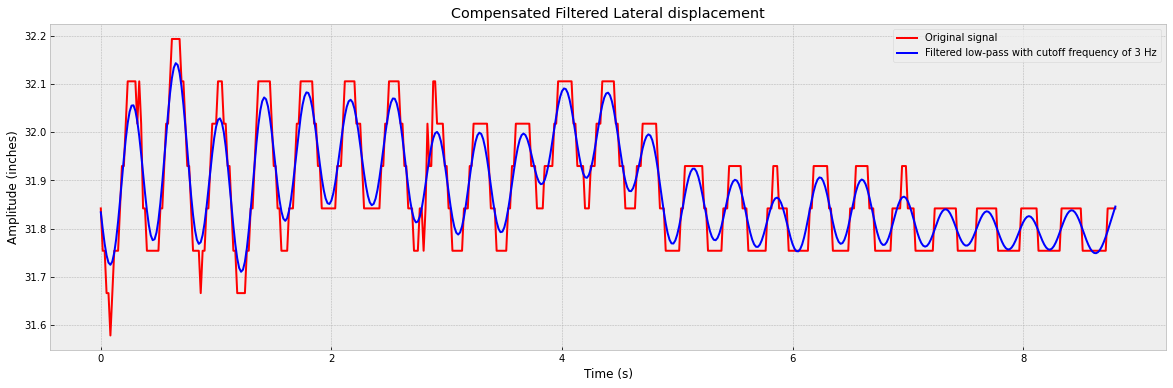

In [23]:
#Apply low-pass filter

from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline 


def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y


# Filter signal x, result stored to y: 
cutoff_frequency =3
a_xf= butter_lowpass_filter(x1*sx, cutoff_frequency, SAMPLE_RATE/2)

# Visualize
plt.figure(figsize=(20,6))
plt.plot(x_axis,x1*sx, color='red', label="Original signal")
plt.plot(x_axis,a_xf, color='blue', label="Filtered low-pass with cutoff frequency of {} Hz".format(cutoff_frequency))
#plt.plot(diff, color='gray', label="What has been removed")
plt.title("Compensated Filtered Lateral displacement")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (inches)')
plt.legend()
plt.show()

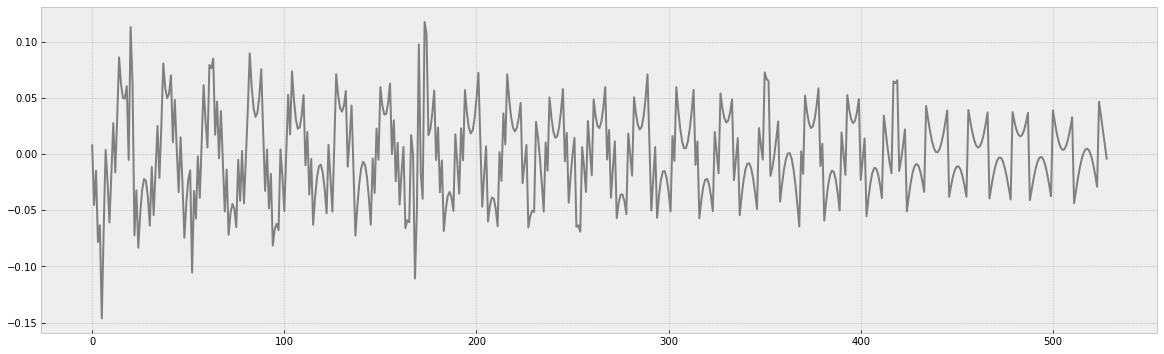

In [26]:
# Difference acts as a special high-pass from a reversed butterworth filter. 
diffx = np.array(x1*sx)-np.array(a_xf)

#Plot noise
plt.figure(figsize=(20, 6))
plt.plot(diffx, color='gray', label="What has been removed")